In [1]:
# Importing data science packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

In [2]:
# This reads a CSV file into a Pandas dataframe from a local filesystem

df = pd.read_csv('/Users/rachelchong/Desktop/Industry Project/Crimes in Chicago Dataset/Chicago_Crimes_2012_to_2017.csv')

In [3]:
# Checking shape of the dataframe

df.shape

(1456714, 23)

In [4]:
# Checking top 5 rows of the dataframe

df.head() 

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [5]:
# This returns a summary of the dataframe, including the column labels, count of non-null values and data types.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [7]:
# This counts unique values in the "WNV Present" column. 
# This helps understand the distribution of different categories in this column.

df['Domestic'].value_counts()

Domestic
False    1236660
True      220054
Name: count, dtype: int64

In [8]:
df['Location Description'].value_counts()

Location Description
STREET                330471
RESIDENCE             233530
APARTMENT             185023
SIDEWALK              160891
OTHER                  55774
                       ...  
CLUB                       1
CTA "L" PLATFORM           1
GARAGE/AUTO REPAIR         1
CHURCH PROPERTY            1
LAGOON                     1
Name: count, Length: 142, dtype: int64

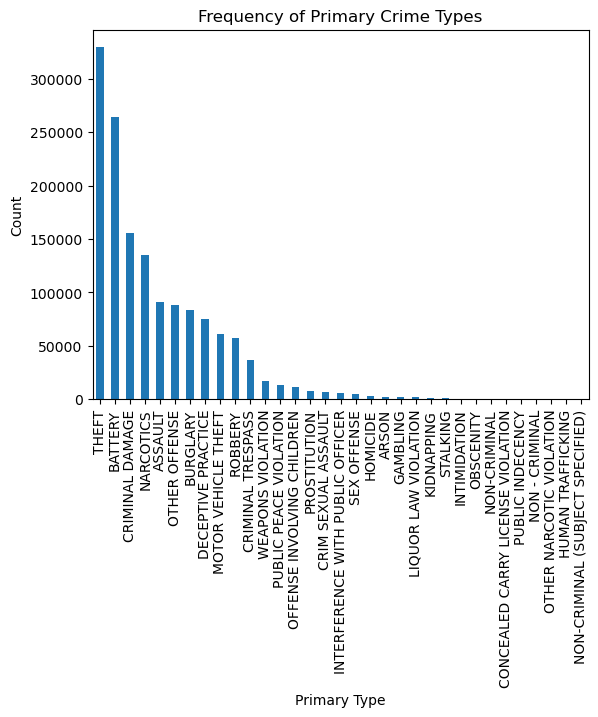

In [11]:
# Frequency of primary crime types
df['Primary Type'].value_counts().plot(kind='bar')
plt.title('Frequency of Primary Crime Types')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.show()

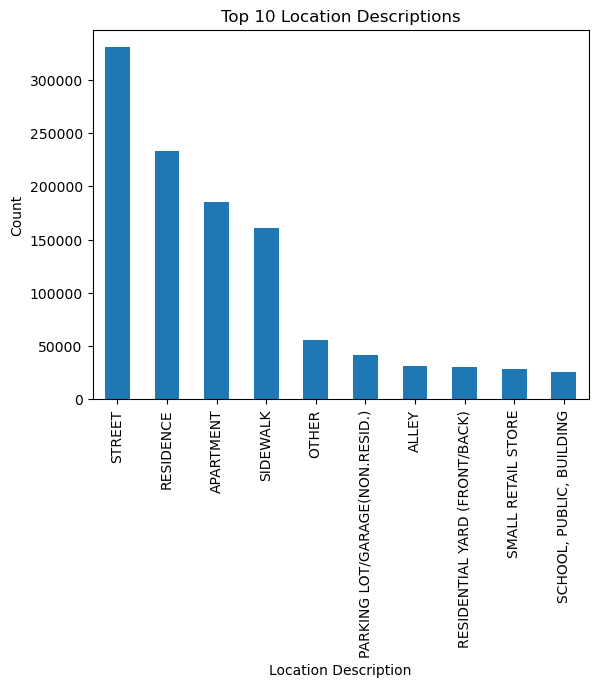

In [12]:
df['Location Description'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Location Descriptions')
plt.xlabel('Location Description')
plt.ylabel('Count')
plt.show()

/var/folders/qy/swc34qts4tqgvsk7v925dzvw0000gn/T/ipykernel_2737/2161565870.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


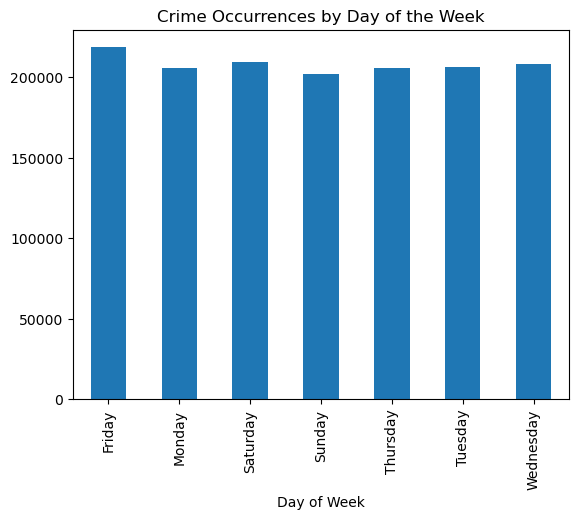

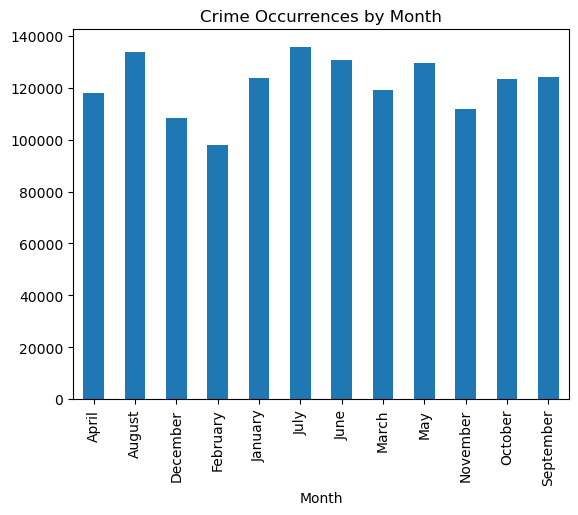

In [13]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group data by day of the week and count occurrences
df['Day of Week'] = df['Date'].dt.day_name()
df.groupby('Day of Week').size().plot(kind='bar')
plt.title('Crime Occurrences by Day of the Week')
plt.show()

# Group data by month and count occurrences
df['Month'] = df['Date'].dt.month_name()
df.groupby('Month').size().plot(kind='bar')
plt.title('Crime Occurrences by Month')
plt.show()

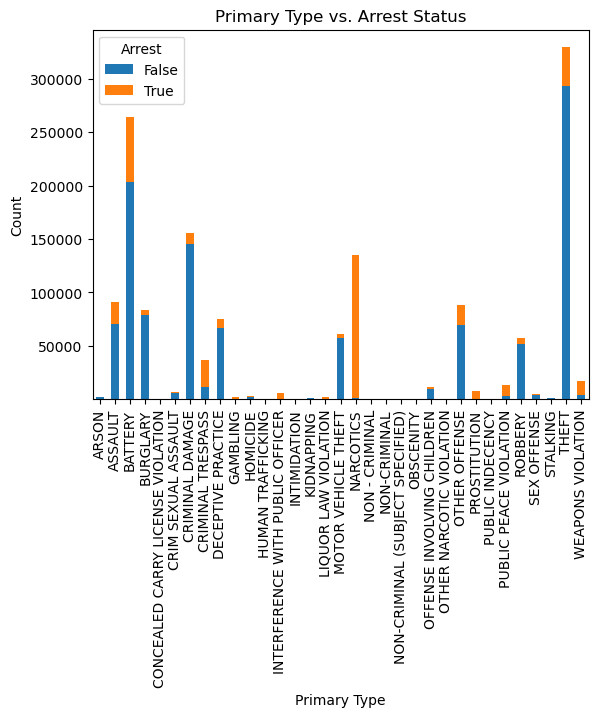

In [15]:
# Explore the relationship between primary crime types and arrests.
# Crosstab of primary type and arrest status
crosstab = pd.crosstab(df['Primary Type'], df['Arrest'])
crosstab.plot(kind='bar', stacked=True)
plt.title('Primary Type vs. Arrest Status')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.show()

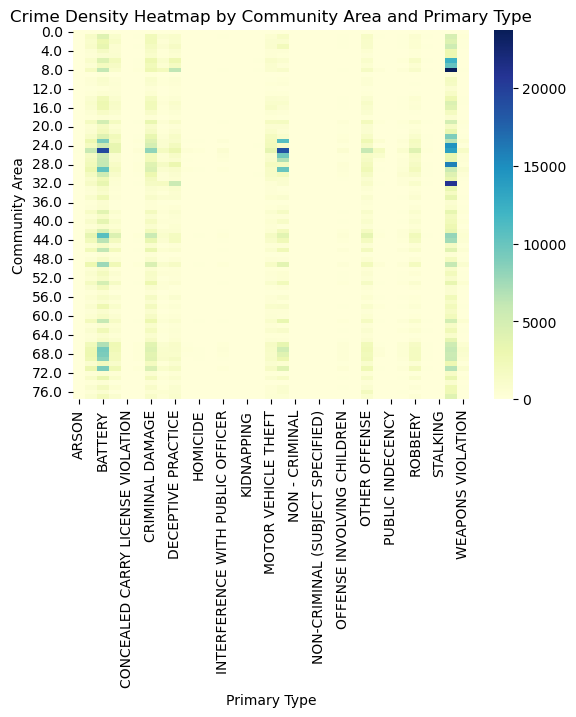

In [16]:
# Pivot table for heatmap
heatmap_data = df.pivot_table(index='Community Area', columns='Primary Type', values='ID', aggfunc='count')

# Plot heatmap
sns.heatmap(heatmap_data.fillna(0), cmap='YlGnBu')
plt.title('Crime Density Heatmap by Community Area and Primary Type')
plt.show()

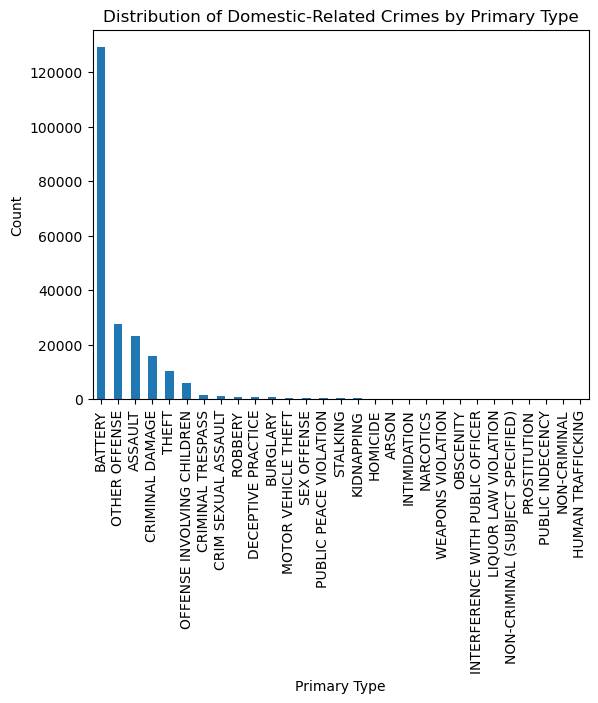

In [17]:
# Filter domestic-related crimes and plot their distribution
domestic_crimes = df[df['Domestic'] == True]
domestic_crimes['Primary Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Domestic-Related Crimes by Primary Type')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.show()